In [30]:
from utils import *
import numpy as np

In [4]:
stats = load_df('nfl_stats.pkl')

In [6]:
stats.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23368 entries, 0 to 24901
Data columns (total 10 columns):
Home           23368 non-null float64
Points         23368 non-null float64
1stD_Off       23368 non-null float64
PassYds_Off    23368 non-null float64
RushYdsOff     23368 non-null float64
Turnovers      23368 non-null float64
1stD_Def       23368 non-null float64
PassYds_Def    23368 non-null float64
RushYds_Def    23368 non-null float64
Takeaways      23368 non-null float64
dtypes: float64(10)
memory usage: 2.0 MB


In [7]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23368 entries, 0 to 24901
Data columns (total 10 columns):
Home           23368 non-null float64
Points         23368 non-null float64
1stD_Off       23368 non-null float64
PassYds_Off    23368 non-null float64
RushYdsOff     23368 non-null float64
Turnovers      23368 non-null float64
1stD_Def       23368 non-null float64
PassYds_Def    23368 non-null float64
RushYds_Def    23368 non-null float64
Takeaways      23368 non-null float64
dtypes: float64(10)
memory usage: 2.0 MB


In [19]:
## these should all be 0. dataset not 100% correct
stats["Turnovers"].value_counts() - stats["Takeaways"].value_counts()

1.0     15
2.0      3
0.0      4
3.0     -5
4.0     -7
5.0     -6
6.0     -1
7.0     -2
8.0      1
9.0      0
10.0    -2
11.0     0
dtype: int64

In [25]:
stats.describe()

,Home,Points,1stD_Off,PassYds_Off,RushYdsOff,Turnovers,1stD_Def,PassYds_Def,RushYds_Def,Takeaways
count,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000
mean,0.498203,20.976763,18.677508,203.874658,119.392032,1.971885,18.578911,203.341621,118.566373,1.975479
std,0.500007,10.389283,5.006880,79.491867,53.230729,1.522524,4.999031,79.413121,53.243032,1.525590
min,0.000000,0.000000,1.000000,-52.000000,0.000000,0.000000,1.000000,-52.000000,-18.000000,0.000000
25%,0.000000,14.000000,15.000000,148.000000,81.000000,1.000000,15.000000,148.000000,80.000000,1.000000
50%,0.000000,20.000000,19.000000,200.000000,113.000000,2.000000,19.000000,199.000000,112.000000,2.000000
75%,1.000000,28.000000,22.000000,256.000000,151.000000,3.000000,22.000000,255.000000,150.000000,3.000000
max,1.000000,62.000000,40.000000,522.000000,407.000000,11.000000,40.000000,522.000000,407.000000,11.000000


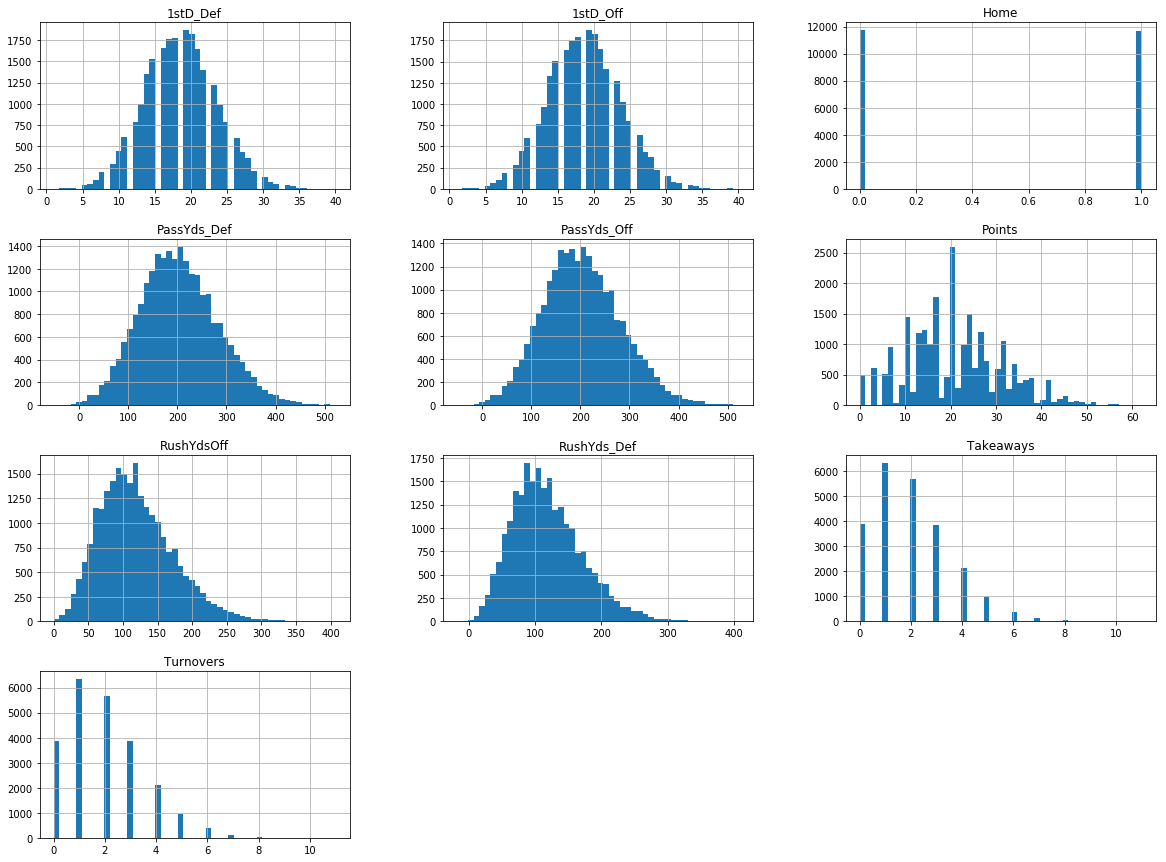

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
stats.hist(bins=50, figsize=(20,15))
plt.show()

In [94]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(stats, test_size=0.2, random_state=42)

print(train_set.shape)
print(test_set.shape)

(14955, 10)
(3739, 10)


In [38]:
test_set["Turnovers"].value_counts() / len(test_set)

1.0     0.271930
2.0     0.241121
0.0     0.162388
3.0     0.158751
4.0     0.098417
5.0     0.043218
6.0     0.014763
7.0     0.007488
8.0     0.001498
9.0     0.000214
10.0    0.000214
Name: Turnovers, dtype: float64

In [40]:
stats = train_set.copy()

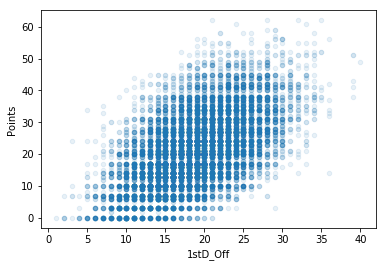

In [53]:
stats.plot(kind="scatter", x="1stD_Off", y="Points", alpha=0.1)

In [51]:
corr_matrix = stats.corr()
corr_matrix["Points"].sort_values(ascending=False)

Points         1.000000
1stD_Off       0.571743
PassYds_Off    0.418906
RushYdsOff     0.392138
Takeaways      0.313375
PassYds_Def    0.212274
Home           0.135208
1stD_Def       0.024805
RushYds_Def   -0.291660
Turnovers     -0.303008
Name: Points, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123ad6a90>,
      dtype=object)

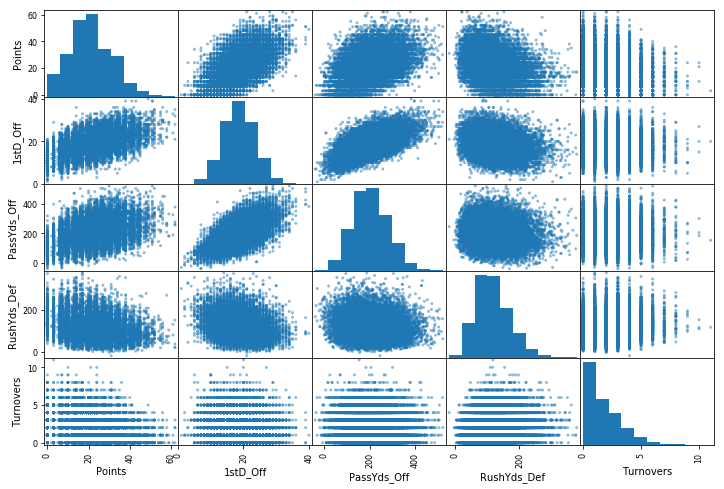

In [54]:
from pandas.plotting import scatter_matrix

attributes = ["Points", "1stD_Off", "PassYds_Off", "RushYds_Def", "Turnovers"]
scatter_matrix(stats[attributes], figsize=(12,8))

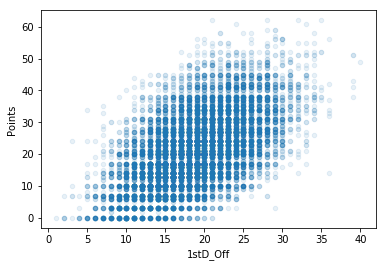

In [56]:
stats.plot(kind="scatter", x="1stD_Off", y="Points", alpha=0.1)

In [57]:
corr_matrix

,Home,Points,1stD_Off,PassYds_Off,RushYdsOff,Turnovers,1stD_Def,PassYds_Def,RushYds_Def,Takeaways
Home,1.000000,0.135208,0.106733,0.044385,0.089246,-0.032944,-0.105408,-0.041694,-0.088819,0.033403
Points,0.135208,1.000000,0.571743,0.418906,0.392138,-0.303008,0.024805,0.212274,-0.291660,0.313375
1stD_Off,0.106733,0.571743,1.000000,0.624969,0.389215,-0.094414,-0.103290,0.112248,-0.253588,-0.035573
PassYds_Off,0.044385,0.418906,0.624969,1.000000,-0.211005,-0.020406,0.108940,0.244434,-0.099512,-0.142768
RushYdsOff,0.089246,0.392138,0.389215,-0.211005,1.000000,-0.151403,-0.249432,-0.095174,-0.258965,0.184425
Turnovers,-0.032944,-0.303008,-0.094414,-0.020406,-0.151403,1.000000,-0.037123,-0.145856,0.192957,-0.025275
1stD_Def,-0.105408,0.024805,-0.103290,0.108940,-0.249432,-0.037123,1.000000,0.623043,0.395937,-0.080491
PassYds_Def,-0.041694,0.212274,0.112248,0.244434,-0.095174,-0.145856,0.623043,1.000000,-0.203038,-0.008981
RushYds_Def,-0.088819,-0.291660,-0.253588,-0.099512,-0.258965,0.192957,0.395937,-0.203038,1.000000,-0.151978
Takeaways,0.033403,0.313375,-0.035573,-0.142768,0.184425,-0.025275,-0.080491,-0.008981,-0.151978,1.000000


In [65]:
stats["NetYds"] = (stats["PassYds_Off"] + stats["RushYdsOff"]) - (stats["PassYds_Def"] + stats["RushYds_Def"])
stats["TotalOffense"] = stats["PassYds_Off"] + stats["RushYdsOff"]
stats["TotalDefense"] = stats["PassYds_Def"] + stats["RushYds_Def"]

In [66]:
corr_matrix = stats.corr()
corr_matrix["Points"].sort_values(ascending=False)

Points          1.000000
TotalOffense    0.631603
1stD_Off        0.571743
NetYds          0.435647
PassYds_Off     0.418906
RushYdsOff      0.392138
Takeaways       0.313375
PassYds_Def     0.212274
Home            0.135208
1stD_Def        0.024805
TotalDefense    0.014218
RushYds_Def    -0.291660
Turnovers      -0.303008
Name: Points, dtype: float64

In [68]:
stats[stats["PassYds_Off"] < 0].min()

Home              0.0
Points            0.0
1stD_Off          1.0
PassYds_Off     -39.0
RushYdsOff       23.0
Turnovers         0.0
1stD_Def         10.0
PassYds_Def      47.0
RushYds_Def     113.0
Takeaways         0.0
NetYds         -482.0
TotalOffense     -7.0
TotalDefense    196.0
dtype: float64

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

pass_off_ix, rush_off_ix, pass_def_ix, rush_def_ix = 3, 4, 7, 8

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_tot_def = True):
        self.add_tot_def = add_tot_def
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        net_yds = (X[:, pass_off_ix] + X[:, rush_off_ix]) - (X[:, pass_def_ix] + X[:, rush_def_ix])
        tot_off = X[:, pass_off_ix] + X[:, rush_off_ix]
        if self.add_tot_def:
            tot_def = X[:, pass_def_ix] + X[:, rush_def_ix]
            return np.c_[X, net_yds, tot_off, tot_def]
        else:
            return np.c_[X, net_yds, tot_off]

In [81]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [182]:
from sklearn.pipeline import Pipeline

stats = train_set.drop("Points", axis=1)
stats_labels = train_set["Points"].copy()
attrs = list(stats.columns)
print(attrs)

pline = Pipeline([
    ('selector', DataFrameSelector(attrs)),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

stats_fit = pline.fit(stats)
stats_prepared = pline.fit_transform(stats)
print(stats_prepared.shape)
print(stats_labels.shape)

['Home', '1stD_Off', 'PassYds_Off', 'RushYdsOff', 'Turnovers', '1stD_Def', 'PassYds_Def', 'RushYds_Def', 'Takeaways']
(14955, 12)
(14955,)


In [116]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(stats_prepared, stats_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
print("Predictions:", lin_reg.predict(stats_prepared[:5]))
print("Labels:", list(stats_labels[:5]))

Predictions: [17.2440642  18.42739092 18.04091631 16.49401079 26.32607256]
Labels: [14.0, 24.0, 27.0, 13.0, 16.0]


In [130]:
from sklearn.metrics import mean_squared_error
stats_predictions = lin_reg.predict(stats_prepared)
lin_mse = mean_squared_error(stats_labels, stats_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

6.657679563152683


In [131]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(stats_prepared, stats_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [132]:
stats_predictions = tree_reg.predict(stats_prepared)
tree_mse = mean_squared_error(stats_labels, stats_predictions)
print(tree_mse)

0.0


In [135]:
print(attrs)
print(stats_prepared[0])

['Home', '1stD_Off', 'PassYds_Off', 'RushYdsOff', 'Turnovers', '1stD_Def', 'PassYds_Def', 'RushYds_Def', 'Takeaways']
[-0.99779581 -1.7511297  -0.89247531 -0.02946977 -0.63336722  1.69906895
  0.74389165  0.05010602  0.01138992 -0.06214805 -0.04758151  0.05063095]


In [185]:
import pandas as pd

chi_today = [[1, 17, 291, 65, 0, 21, 258, 42, 2]]
phi_today = [[0, 21, 258, 42, 2, 17, 291, 65, 0]]
df = pd.DataFrame(phi_today, columns=stats.columns)
chi_today_prepared = stats_fit.transform(df)
lin_reg.predict(chi_today_prepared)
#chi_pred = lin_reg.predict(chi_today)
#print(chi_pred)

array([15.42653643])

In [191]:
from sklearn.model_selection import cross_val_score
# cross-val features expect utility function rather than cost, hence neg_mean_squared_error
scores = cross_val_score(tree_reg, stats_prepared, stats_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [192]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [ 9.47795077 10.00815176  9.63408055  9.80021008  9.60983509  9.71087037
  9.73553296  9.43834065  9.78569702  9.40155826]
Mean: 9.660222751021719
Standard Deviation: 0.17810559812494092


In [193]:
lin_scores = cross_val_score(lin_reg, stats_prepared, stats_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.66868835 6.77229385 6.42148112 6.83719176 6.56816974 6.64857564
 6.89240483 6.51860538 6.73502202 6.53553572]
Mean: 6.6597968400038665
Standard Deviation: 0.14305963046080308


In [196]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(stats_prepared, stats_labels)

forest_predictions = forest_reg.predict(stats_prepared)
forest_mse = mean_squared_error(stats_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, stats_prepared, stats_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

3.0087039677181195
Scores: [7.22190018 7.27702275 6.7924689  7.25505172 7.08599583 7.08349157
 7.19584189 6.97864396 7.2568473  6.86987559]
Mean: 7.101713969331402
Standard Deviation: 0.16331676829656672


In [198]:
from sklearn.externals import joblib

joblib.dump(lin_reg, 'linear.pkl')
joblib.dump(lin_rmse_scores, 'linear_crossval_scores.pkl')

joblib.dump(tree_reg, 'decision_tree.pkl')
joblib.dump(tree_rmse_scores, 'decision_tree_crossval_scores.pkl')

joblib.dump(forest_reg, 'random_forest.pkl')
joblib.dump(forest_rmse_scores, 'random_forest_crossval_scores.pkl')

['random_forest_crossval_scores.pkl']

In [200]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(stats_prepared, stats_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [201]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [202]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.08008183291103 {'max_features': 2, 'n_estimators': 3}
7.152342320434102 {'max_features': 2, 'n_estimators': 10}
6.871117496874614 {'max_features': 2, 'n_estimators': 30}
7.884962206510911 {'max_features': 4, 'n_estimators': 3}
7.048304224705306 {'max_features': 4, 'n_estimators': 10}
6.818970153237299 {'max_features': 4, 'n_estimators': 30}
7.889767689321611 {'max_features': 6, 'n_estimators': 3}
7.058285119854975 {'max_features': 6, 'n_estimators': 10}
6.833766695600446 {'max_features': 6, 'n_estimators': 30}
7.868221177067377 {'max_features': 8, 'n_estimators': 3}
7.054024746817912 {'max_features': 8, 'n_estimators': 10}
6.847372703909591 {'max_features': 8, 'n_estimators': 30}
7.936377270421393 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
7.1091609332036665 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7.888550464186611 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7.097129730949014 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [206]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00990292, 0.22437748, 0.15878509, 0.08622231, 0.06240205,
       0.04790957, 0.0680911 , 0.04767582, 0.09752715, 0.08158884,
       0.07095348, 0.04456418])

In [209]:
pline.named_steps

{'selector': DataFrameSelector(attribute_names=['Home', '1stD_Off', 'PassYds_Off', 'RushYdsOff', 'Turnovers', '1stD_Def', 'PassYds_Def', 'RushYds_Def', 'Takeaways']),
 'attribs_adder': CombinedAttributesAdder(add_tot_def=True),
 'std_scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [212]:
extra_attribs = ["NetYds", "TotOff", "TotDef"]
attributes = attrs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.22437748227489435, '1stD_Off'),
 (0.15878508920701803, 'PassYds_Off'),
 (0.09752715287787499, 'Takeaways'),
 (0.08622230926899889, 'RushYdsOff'),
 (0.0815888368731666, 'NetYds'),
 (0.0709534826935509, 'TotOff'),
 (0.06809109887320108, 'PassYds_Def'),
 (0.06240205249121541, 'Turnovers'),
 (0.04790957392421644, '1stD_Def'),
 (0.0476758174817999, 'RushYds_Def'),
 (0.044564184241533314, 'TotDef'),
 (0.009902919792530161, 'Home')]

In [214]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Points", axis=1)
y_test = test_set["Points"].copy()

X_test_prepared = pline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

6.904632090902371
